In [1]:
import pandas as pd

df = pd.read_csv('merged_recipe_price_nodupl.csv')

df

,title,ingredient,amount,unit,matched_product,match_score,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE
0,No-Bake Nut Cookies,brown sugar,1.00,c,johnsonville brown sugar honey breakfast saus...,100.0,Johnsonville Brown Sugar & Honey Breakfast Sau...,johnsonville,3.98,3.98,12.0
1,No-Bake Nut Cookies,milk,0.50,c,russell stover sugar free milk chocolate pecan...,100.0,Russell Stover Sugar Free Milk Chocolate Pecan...,russell stover,2.18,2.18,3.0
2,No-Bake Nut Cookies,vanilla,0.50,tsp,starbucks doubleshot energy vanilla coffee ene...,100.0,Starbucks Doubleshot Energy Vanilla Coffee Ene...,starbucks,2.98,2.98,15.0
3,No-Bake Nut Cookies,nuts,0.50,c,emerald nuts cashews almonds with dried cranb...,100.0,"Emerald Nuts, Cashews & Almonds with Dried Cra...",emerald,5.24,5.24,6.0
4,No-Bake Nut Cookies,butter,2.00,tbsp,crisco gluten free butter flavor all vegetable...,100.0,"Crisco Gluten Free, Butter Flavor, All Vegetab...",crisco,7.70,7.70,20.0
...,...,...,...,...,...,...,...,...,...,...,...
139810,Pork Chop 'N Potato Bake,sour cream,0.50,c,prices grade a red and green chile sour cream ...,100.0,Price's Grade A Red And Green Chile Sour Cream...,price's,3.12,3.12,12.0
139811,Pork Chop 'N Potato Bake,ground black pepper,0.25,tsp,great value ground black pepper 3 oz,100.0,"Great Value Ground Black Pepper, 3 oz",great value,3.12,3.12,3.0
139812,Pork Chop 'N Potato Bake,potatoes,NaN,NaN,bob evans original mashed potatoes refrigerate...,100.0,"Bob Evans Original Mashed Potatoes, Refrigerat...",bob evans,3.64,3.64,24.0
139813,Pork Chop 'N Potato Bake,Cheddar cheese,4.00,oz,sensible portions glutenfree sea salt zesty ra...,100.0,"Sensible Portions Gluten-Free Sea Salt, Zesty ...",sensible portions,7.68,7.68,0.0


# Cleaning the dataset

In [2]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [3]:
df = df[df['match_score'] == 100]
df.reset_index(inplace=True, drop=True)

In [4]:
df = df[df['PRODUCT_SIZE'] != 0]
df.reset_index(inplace=True, drop=True)

# Calulate cost per serving

In [5]:
df['Price_per_ingredient'] = df['PRICE_CURRENT']/df['PRODUCT_SIZE']

In [6]:
df['Current_price_amount_ingredient'] = df['amount']*df['Price_per_ingredient']

In [7]:
df[df['title'] == 'No-Bake Nut Cookies'].to_csv('test.csv', index=False)

In [8]:
df.ingredient.value_counts().to_csv('ingredient_counts.csv', index=True)

In [9]:
df.unit.value_counts()

unit
c              43005
tsp            20631
tbsp           11111
oz              9277
lb              5562
cup              623
cups             241
teaspoon          56
pound             30
ounce             20
tablespoon        16
tablespoons       14
teaspoons          8
Name: count, dtype: int64

# Dictionary with Cost for each recipe

In [10]:
sum_dict = df.groupby('title')['Current_price_amount_ingredient'].sum().to_dict()

sum_dict


{'"24 Hour Layered Salad"': 1.2162499999999998,
 '"A B C" Sandwich': 0.8823214285714286,
 '"All-American" Strawberry Pie': 3.696833333333333,
 '"Arni Psito" - Roast Leg Of Lamb': 83.21784338235294,
 '"B" Cookies': 5.613,
 '"Berry" Delicious Fruit Shortcake': 30.763319444444445,
 '"Bev\'S Cocoa"': 26.461333333333336,
 '"Bonnie\'S" Sweet Potato Gook': 8.94951515151515,
 '"Buch\'Ta"': 11.495319444444444,
 '"Buckeyes"': 3.2461052631578946,
 '"Bumsteads"': 6.306185185185186,
 '"Carolina Housewife" Wedding Cake Of 1850': 65.58807393939394,
 '"Cheaters" Mexican Bake': 7.574,
 '"Cholives" Puff Appetizers': 4.35575,
 '"Cobbler Pie"': 3.0304166666666665,
 '"Coffee Float"': 0.25261904761904763,
 '"Cold Oven" Lemon Pound Cake': 8.493916666666667,
 '"Company" Bread': 5.0075,
 '"Cowbelle" Special': 5.835999999999999,
 '"Date Ball" Cookies': 3.0288145161290325,
 '"Delicious" Taco Soup': 0.226875,
 '"Delightfully Quick Stir-Fry"': 5.682812500000001,
 '"Diples" - Honey Ripples': 5.700666666666667,
 '"D

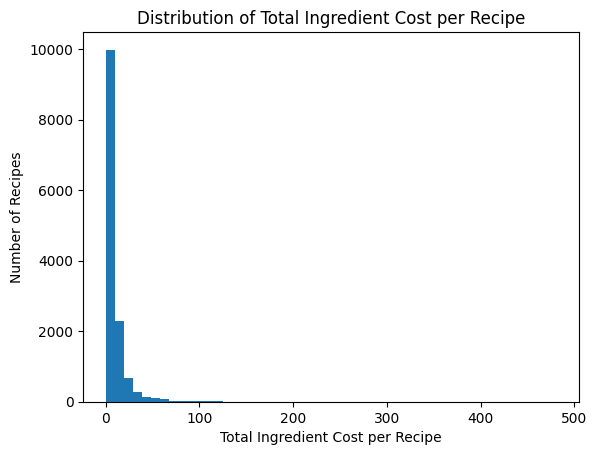

In [11]:
from matplotlib import pyplot as plt

plt.hist(list(sum_dict.values()), bins=50)
plt.xlabel('Total Ingredient Cost per Recipe')
plt.ylabel('Number of Recipes')
plt.title('Distribution of Total Ingredient Cost per Recipe')
plt.show()

In [12]:
df_data = df.copy(deep=True)

In [13]:
df_data

,title,ingredient,amount,unit,matched_product,match_score,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,Price_per_ingredient,Current_price_amount_ingredient
0,No-Bake Nut Cookies,brown sugar,1.00,c,johnsonville brown sugar honey breakfast saus...,100.0,Johnsonville Brown Sugar & Honey Breakfast Sau...,johnsonville,3.98,3.98,12.0,0.331667,0.331667
1,No-Bake Nut Cookies,milk,0.50,c,russell stover sugar free milk chocolate pecan...,100.0,Russell Stover Sugar Free Milk Chocolate Pecan...,russell stover,2.18,2.18,3.0,0.726667,0.363333
2,No-Bake Nut Cookies,vanilla,0.50,tsp,starbucks doubleshot energy vanilla coffee ene...,100.0,Starbucks Doubleshot Energy Vanilla Coffee Ene...,starbucks,2.98,2.98,15.0,0.198667,0.099333
3,No-Bake Nut Cookies,nuts,0.50,c,emerald nuts cashews almonds with dried cranb...,100.0,"Emerald Nuts, Cashews & Almonds with Dried Cra...",emerald,5.24,5.24,6.0,0.873333,0.436667
4,No-Bake Nut Cookies,butter,2.00,tbsp,crisco gluten free butter flavor all vegetable...,100.0,"Crisco Gluten Free, Butter Flavor, All Vegetab...",crisco,7.70,7.70,20.0,0.385000,0.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90589,Pork Chop 'N Potato Bake,condensed cream,10.75,oz,great value cream of chicken condensed soup 10...,100.0,"Great Value Cream Of Chicken Condensed Soup, 1...",great value,0.68,0.68,10.0,0.068000,0.731000
90590,Pork Chop 'N Potato Bake,milk,0.50,c,russell stover sugar free milk chocolate pecan...,100.0,Russell Stover Sugar Free Milk Chocolate Pecan...,russell stover,2.18,2.18,3.0,0.726667,0.363333
90591,Pork Chop 'N Potato Bake,sour cream,0.50,c,prices grade a red and green chile sour cream ...,100.0,Price's Grade A Red And Green Chile Sour Cream...,price's,3.12,3.12,12.0,0.260000,0.130000
90592,Pork Chop 'N Potato Bake,ground black pepper,0.25,tsp,great value ground black pepper 3 oz,100.0,"Great Value Ground Black Pepper, 3 oz",great value,3.12,3.12,3.0,1.040000,0.260000


# Defining Functions to Extract Nutrition information

In [ ]:
import os
import re
import requests
import pandas as pd

# -------------------------------------------------------------------
# CONFIG
# -------------------------------------------------------------------

# Either set this env var, or just paste your key as a string here
# FDC_API_KEY = os.getenv("FDC_API_KEY", "YOUR_FDC_API_KEY_HERE").strip()

FDC_SEARCH_URL = "https://api.nal.usda.gov/fdc/v1/foods/search"
FDC_FOOD_URL   = "https://api.nal.usda.gov/fdc/v1/food/"

# -------------------------------------------------------------------
# HELPERS: text + units
# -------------------------------------------------------------------

def _norm(s: str) -> str:
    """Lowercase and strip to letters/numbers/spaces."""
    return re.sub(r"[^a-z0-9 ]+", " ", str(s).lower()).strip()

# Approximate grams per cup for common ingredients (extend as needed)
CUP_GRAMS = {
    "milk": 240.0,
    "brown sugar": 220.0,
    "sugar": 200.0,
    "granulated sugar": 200.0,
    "white sugar": 200.0,
    "butter": 227.0,
    "flour": 120.0,
    "all purpose flour": 120.0,
    "peanut butter": 258.0,
    "rolled oats": 80.0,
}

# Canonicalize all unit variants
UNIT_ALIAS = {
    "c": "cup",
    "cup": "cup",
    "cups": "cup",

    "tsp": "tsp",
    "teaspoon": "tsp",
    "teaspoons": "tsp",

    "tbsp": "tbsp",
    "tablespoon": "tbsp",
    "tablespoons": "tbsp",

    "oz": "oz",
    "ounce": "oz",
    "ounces": "oz",

    "lb": "lb",
    "pound": "lb",
    "pounds": "lb",

    "g": "g",
    "gram": "g",
    "grams": "g",

    "kg": "kg",
    "kilogram": "kg",
    "kilograms": "kg",
}


def to_grams(amount, unit, ingredient=None):
    """
    Convert (amount, unit) to grams.
    Returns float grams or None if unknown.
    """
    if pd.isna(amount) or pd.isna(unit):
        return None

    raw_unit = str(unit).strip().lower()
    u = UNIT_ALIAS.get(raw_unit, raw_unit)  # fall back to raw if unseen
    ing = (ingredient or "").strip().lower()
    amt = float(amount)

    # direct weight units
    if u == "g":
        return amt
    if u == "kg":
        return amt * 1000.0
    if u == "oz":
        # treat as weight ounce
        return amt * 28.3495
    if u == "lb":
        return amt * 453.592

    # volume units based on "cup" densities
    if u == "cup":
        base = CUP_GRAMS.get(ing, 240.0)  # generic cup fallback
        return amt * base

    if u == "tbsp":
        # 1 cup = 16 tbsp
        base = CUP_GRAMS.get(ing, 240.0)
        return amt * (base / 16.0)

    if u == "tsp":
        # 1 cup = 48 tsp
        base = CUP_GRAMS.get(ing, 240.0)
        return amt * (base / 48.0)

    # anything else → unknown
    return None


# -------------------------------------------------------------------
# FDC LOOKUP (with caching)
# -------------------------------------------------------------------

_fdc_match_cache = {}
_fdc_nutr_cache = {}

from requests.exceptions import ReadTimeout, RequestException

def fdc_safe_get(url, params, max_retries=3, timeout=30, sleep_between=1.0):
    """
    Robust GET for FDC with retries + backoff.
    Returns parsed JSON or None if it ultimately fails.
    """
    for attempt in range(max_retries):
        try:
            r = requests.get(url, params=params, timeout=timeout)
            r.raise_for_status()
            return r.json()
        except ReadTimeout:
            # retry a few times on timeout
            if attempt == max_retries - 1:
                print(f"[WARN] ReadTimeout for {url} with params {params}. Giving up.")
                return None
            wait = sleep_between * (2 ** attempt)
            print(f"[INFO] ReadTimeout, retrying in {wait:.1f}s (attempt {attempt+1}/{max_retries})")
            time.sleep(wait)
        except RequestException as e:
            status = getattr(e.response, "status_code", None)
            # don't retry on 4xx (client errors like 400/403/404)
            if status is not None and 400 <= status < 500:
                print(f"[WARN] FDC client error {status} for {url} with params {params}. Not retrying.")
                return None
            # 5xx or network errors → retry
            if attempt == max_retries - 1:
                print(f"[WARN] FDC request failed after {max_retries} attempts: {e}")
                return None
            wait = sleep_between * (2 ** attempt)
            print(f"[INFO] FDC error {status}, retrying in {wait:.1f}s (attempt {attempt+1}/{max_retries})")
            time.sleep(wait)


def fdc_best_generic(ingredient: str):
    ing_key = _norm(ingredient)
    if ing_key in _fdc_match_cache:
        return _fdc_match_cache[ing_key]

    params = {
        "api_key": FDC_API_KEY,
        "query": ingredient,
        "pageSize": 25,
        "dataType": ["SR Legacy", "Survey (FNDDS)", "Foundation"],
    }

    data = fdc_safe_get(FDC_SEARCH_URL, params, max_retries=3, timeout=30, sleep_between=1.0)
    if data is None:
        _fdc_match_cache[ing_key] = None
        return None

    foods = data.get("foods", [])
    if not foods:
        _fdc_match_cache[ing_key] = None
        return None

    ing_tokens = set(_norm(ingredient).split())
    best = None
    best_score = -1

    for f in foods:
        desc = f.get("description", "")
        desc_tokens = set(_norm(desc).split())
        overlap = len(ing_tokens & desc_tokens)
        score = overlap + float(f.get("score", 0.0)) / 100.0
        if score > best_score:
            best_score = score
            best = {
                "fdc_id": f["fdcId"],
                "description": desc,
                "category": f.get("foodCategory"),
            }

    _fdc_match_cache[ing_key] = best
    return best


def fdc_nutrients_per_100g(fdc_id: int):
    if fdc_id in _fdc_nutr_cache:
        return _fdc_nutr_cache[fdc_id]

    params = {"api_key": FDC_API_KEY}
    data = fdc_safe_get(FDC_FOOD_URL + str(fdc_id), params, max_retries=3, timeout=30, sleep_between=1.0)
    if data is None:
        out = {"kcal": None, "protein_g": None, "fat_g": None, "carb_g": None}
        _fdc_nutr_cache[fdc_id] = out
        return out

    food = data
    nutrients = food.get("foodNutrients", [])
    out = {"kcal": None, "protein_g": None, "fat_g": None, "carb_g": None}

    for n in nutrients:
        name = _norm(n.get("nutrientName", ""))
        unit = n.get("unitName")
        value = n.get("value")
        if value is None:
            continue

        if "energy" in name and unit == "kcal":
            out["kcal"] = float(value)
        elif "protein" in name and unit == "g":
            out["protein_g"] = float(value)
        elif ("fat" in name or "lipid" in name) and unit == "g":
            out["fat_g"] = float(value)
        elif ("carbohydrate" in name or "carb" in name) and unit == "g":
            out["carb_g"] = float(value)

    _fdc_nutr_cache[fdc_id] = out
    return out

# -------------------------------------------------------------------
# MAIN ANNOTATION FUNCTION
# -------------------------------------------------------------------

import time

def add_fdc_nutrition(
    df: pd.DataFrame,
    ingredient_col: str = "ingredient",
    amount_col: str = "amount",
    unit_col: str = "unit",
    allow_off: bool = False,   # kept for compatibility, unused
    sleep_s: float = 0.0,
) -> pd.DataFrame:
    rows = []

    for idx, row in df.iterrows():
        ing  = row[ingredient_col]
        amt  = row[amount_col]
        unit = row[unit_col]

        grams = to_grams(amt, unit, ing)

        match = fdc_best_generic(ing) if pd.notna(ing) else None
        if match:
            nut100 = fdc_nutrients_per_100g(match["fdc_id"])
        else:
            nut100 = {"kcal": None, "protein_g": None, "fat_g": None, "carb_g": None}

        def scale(key):
            if grams is None or nut100[key] is None:
                return None
            return grams * nut100[key] / 100.0

        new_row = row.copy()

        # FDC info
        new_row["fdc_id"]          = match["fdc_id"] if match else None
        new_row["fdc_description"] = match["description"] if match else None
        new_row["fdc_category"]    = match["category"] if match else None

        # per-100g macros
        new_row["kcal_per_100g"]    = nut100["kcal"]
        new_row["protein_per_100g"] = nut100["protein_g"]
        new_row["fat_per_100g"]     = nut100["fat_g"]
        new_row["carb_per_100g"]    = nut100["carb_g"]

        # quantity in grams
        new_row["grams"]            = grams

        # totals for this ingredient amount
        new_row["kcal_total"]       = scale("kcal")
        new_row["protein_total_g"]  = scale("protein_g")
        new_row["fat_total_g"]      = scale("fat_g")
        new_row["carb_total_g"]     = scale("carb_g")

        # flags
        new_row["fdc_ok"]     = bool(match is not None and nut100["kcal"] is not None)
        new_row["grams_ok"]   = grams is not None
        new_row["ok_for_kcal"] = bool(new_row["fdc_ok"] and new_row["grams_ok"])

        rows.append(new_row)

        if sleep_s > 0:
            time.sleep(sleep_s)

    return pd.DataFrame(rows)



In [ ]:
import time
import requests
from requests.exceptions import ReadTimeout, RequestException

FDC_SEARCH_URL = "https://api.nal.usda.gov/fdc/v1/foods/search"
FDC_FOOD_URL   = "https://api.nal.usda.gov/fdc/v1/food/"

# Make sure FDC_API_KEY is set correctly before this cell
print("Using FDC_API_KEY:", FDC_API_KEY[:4] + "..." + FDC_API_KEY[-4:])

_fdc_match_cache = {}
_fdc_nutr_cache = {}

def fdc_safe_get(url, params, max_retries=3, timeout=60, sleep_between=1.0):
    """
    Robust GET for FDC with retries + longer timeout.
    Returns parsed JSON or None if it ultimately fails.
    """
    for attempt in range(max_retries):
        try:
            r = requests.get(url, params=params, timeout=timeout)
            r.raise_for_status()
            return r.json()
        except ReadTimeout:
            if attempt == max_retries - 1:
                print(f"[WARN] ReadTimeout for {url} with params {params}. Giving up.")
                return None
            wait = sleep_between * (2 ** attempt)
            print(f"[INFO] ReadTimeout, retrying in {wait:.1f}s (attempt {attempt+1}/{max_retries})")
            time.sleep(wait)
        except RequestException as e:
            status = getattr(e.response, "status_code", None)
            if status is not None and 400 <= status < 500:
                # client error, don't retry
                print(f"[WARN] FDC client error {status} for {url}. Not retrying.")
                return None
            if attempt == max_retries - 1:
                print(f"[WARN] FDC request failed after {max_retries} attempts: {e}")
                return None
            wait = sleep_between * (2 ** attempt)
            print(f"[INFO] FDC error {status}, retrying in {wait:.1f}s (attempt {attempt+1}/{max_retries})")
            time.sleep(wait)

# # Prefer better search terms for some generic ingredients

FDC_SYNONYMS = {
    "milk": "cow milk whole 3.25% milkfat",
    "frozen corn": "corn sweet yellow frozen kernels unprepared",
    "corn": "corn sweet yellow kernels",
    # you can add more if you want, but it will work without extras
}

FDC_NEGATIVE_KEYWORDS = {
    "human",
    "infant",
    "baby",
    "formula",
    "corn dog",
    "hot dog",
    "sausage",
    "frank",
}

# Prefer better search phrases for some ingredients
FDC_SYNONYMS.update({
    "milk": "cow milk whole 3.25% milkfat",
    "frozen corn": "corn sweet yellow frozen kernels unprepared",
    "corn": "corn sweet yellow kernels",
})

# Things we really don't want for basic ingredients
FDC_NEGATIVE_KEYWORDS.update({
    "corn dog",
    "dogs",      # as in corn dogs
    "dog",
    "hot dog",
    "sausage",
    "frank",
})

# For some ingredients we *force* a specific FDC id that we know is good.
FDC_ID_OVERRIDES = {
    # examples – YOU will fill in the actual IDs after inspecting search results:
    # "cream cheese": 123456,
    # "milk": 234567,
    # "frozen corn": 345678,
}


def fdc_best_generic(ingredient: str):
    """
    Search FDC for a generic ingredient match.
    Uses SR Legacy / Foundation / Survey (no branded).
    Applies synonyms + negative filters so we don't get stuff like corn dogs for 'frozen corn'.
    """
    ing_raw = str(ingredient)
    ing_key = re.sub(r"[^a-z0-9 ]+", " ", ing_raw.lower()).strip()

    # cache
    if ing_key in _fdc_match_cache:
        return _fdc_match_cache[ing_key]

    # if we have a synonym, use that query
    query = FDC_SYNONYMS.get(ing_key, ing_raw)

    params = {
        "api_key": FDC_API_KEY,
        "query": query,
        "pageSize": 25,
        "dataType": ["SR Legacy", "Survey (FNDDS)", "Foundation"],
    }

    data = fdc_safe_get(FDC_SEARCH_URL, params, max_retries=3, timeout=60, sleep_between=1.0)
    if data is None:
        _fdc_match_cache[ing_key] = None
        return None

    foods = data.get("foods", [])
    if not foods:
        _fdc_match_cache[ing_key] = None
        return None

    ing_tokens = set(ing_key.split())
    best = None
    best_score = -1

    for f in foods:
        desc = f.get("description", "") or ""
        desc_norm = re.sub(r"[^a-z0-9 ]+", " ", desc.lower()).strip()
        desc_tokens = set(desc_norm.split())
        category = (f.get("foodCategory") or "").lower()

        # --- hard filters to avoid obvious garbage ---
        # 1) skip descriptions with strong negative words
        if any(bad in desc_norm for bad in FDC_NEGATIVE_KEYWORDS):
            continue

        # 2) if ingredient doesn't mention 'meal', 'entree', etc.,
        #    avoid generic meals/entrees categories
        if ("meal" not in ing_key and "entree" not in ing_key and
            "meals" in category):
            continue

        # --- scoring: overlap + FDC score ---
        overlap = len(ing_tokens & desc_tokens)
        fdc_score = float(f.get("score", 0.0)) / 100.0
        score = overlap + fdc_score

        if score > best_score:
            best_score = score
            best = {
                "fdc_id": f["fdcId"],
                "description": desc,
                "category": f.get("foodCategory"),
            }

    _fdc_match_cache[ing_key] = best
    return best



Using FDC_API_KEY: zuF3...L0im


In [30]:
try:
    _fdc_match_cache.clear()
except NameError:
    _fdc_match_cache = {}

try:
    _fdc_nutr_cache.clear()
except NameError:
    _fdc_nutr_cache = {}


In [31]:
def fdc_nutrients_per_100g(fdc_id: int):
    """
    Return kcal, protein, fat, carbs per 100 g as a dict.
    Handles both classic (208/203/204/205) and new (1008/1003/1004/1005)
    nutrient numbers, and both 'value' and 'amount' fields.
    """
    if fdc_id in _fdc_nutr_cache:
        return _fdc_nutr_cache[fdc_id]

    params = {"api_key": FDC_API_KEY}
    data = fdc_safe_get(
        FDC_FOOD_URL + str(fdc_id),
        params,
        max_retries=3,
        timeout=60,
        sleep_between=1.0,
    )

    out = {"kcal": None, "protein_g": None, "fat_g": None, "carb_g": None}

    if data is None:
        _fdc_nutr_cache[fdc_id] = out
        return out

    nutrients = data.get("foodNutrients", [])
    if not nutrients:
        _fdc_nutr_cache[fdc_id] = out
        return out

    def _norm(s: str) -> str:
        return re.sub(r"[^a-z0-9 ]+", " ", str(s).lower()).strip()

    for n in nutrients:
        # Handle both flat and nested nutrient objects
        num = (
            str(n.get("nutrientNumber"))
            if n.get("nutrientNumber") is not None
            else str(n.get("nutrient", {}).get("number", ""))
        )

        name = (
            n.get("nutrientName")
            if n.get("nutrientName") is not None
            else n.get("nutrient", {}).get("name", "")
        )

        unit = (
            n.get("unitName")
            if n.get("unitName") is not None
            else n.get("nutrient", {}).get("unitName", "")
        )

        # Some FDC entries use 'value', others use 'amount'
        value = n.get("value")
        if value is None:
            value = n.get("amount")
        if value is None:
            continue

        name_norm = _norm(name)
        unit_norm = unit.lower()

        # Map both classic and new nutrient numbers
        # Energy: 208 or 1008 (kcal)
        if num in {"208", "1008"} and unit_norm == "kcal":
            out["kcal"] = float(value)

        # Protein: 203 or 1003 (g)
        elif num in {"203", "1003"} and unit_norm in {"g"}:
            out["protein_g"] = float(value)

        # Fat: 204 or 1004 (g)
        elif num in {"204", "1004"} and unit_norm in {"g"}:
            out["fat_g"] = float(value)

        # Carbs: 205 or 1005 (g)
        elif num in {"205", "1005"} and unit_norm in {"g"}:
            out["carb_g"] = float(value)

        else:
            # Fallback heuristics by name, in case numbers are missing/weird
            if out["kcal"] is None and "energy" in name_norm and unit_norm == "kcal":
                out["kcal"] = float(value)
            elif out["protein_g"] is None and "protein" in name_norm and unit_norm == "g":
                out["protein_g"] = float(value)
            elif out["fat_g"] is None and ("fat" in name_norm or "lipid" in name_norm) and unit_norm == "g":
                out["fat_g"] = float(value)
            elif out["carb_g"] is None and ("carbohydrate" in name_norm or "carb" in name_norm) and unit_norm == "g":
                out["carb_g"] = float(value)

    _fdc_nutr_cache[fdc_id] = out
    return out


In [36]:
# If these exist in your notebook:
try:
    _fdc_nutr_cache.clear()
except NameError:
    _fdc_nutr_cache = {}


In [37]:
try:
    _fdc_match_cache.clear()
except NameError:
    _fdc_match_cache = {}


# Extracting nutrition information

In [ ]:
# Make sure your key is loaded (either env or inline)
os.environ["FDC_API_KEY"] = "PUT_YOUR_API_KEY_HERE"  # example key; replace with your own
FDC_API_KEY = os.environ["FDC_API_KEY"]  
# Quick sanity check: print the first/last 4 chars so you know it's set
print("FDC key loaded:", os.getenv("FDC_API_KEY")[:4] + "..." + os.getenv("FDC_API_KEY")[-4:])

list_df_enriched = []
for i in range(df_data.shape[0] // 500 + 1):
    batch = df_data[i*500:(i+1)*500]
    if batch.empty:
        continue

    print(f"Processing batch {i+1}... ({batch.shape[0]} rows)")
    df_batch_enriched = add_fdc_nutrition(
        batch,
        allow_off=False,
        sleep_s=0.0  # this is separate from the FDC internal retries
    )
    df_batch_enriched.to_csv(f"df_enriched_batch_{i+1}.csv", index=False)
    list_df_enriched.append(df_batch_enriched)

df_enriched = pd.concat(list_df_enriched, ignore_index=True)


In [42]:
df_enriched

,title,ingredient,amount,unit,matched_product,match_score,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,...,fat_per_100g,carb_per_100g,grams,kcal_total,protein_total_g,fat_total_g,carb_total_g,fdc_ok,grams_ok,ok_for_kcal
0,No-Bake Nut Cookies,brown sugar,1.00,c,johnsonville brown sugar honey breakfast saus...,100.0,Johnsonville Brown Sugar & Honey Breakfast Sau...,johnsonville,3.98,3.98,...,0.00,98.10,220.000000,836.000000,0.264000,0.000000,215.820000,True,True,True
1,No-Bake Nut Cookies,milk,0.50,c,russell stover sugar free milk chocolate pecan...,100.0,Russell Stover Sugar Free Milk Chocolate Pecan...,russell stover,2.18,2.18,...,NaN,NaN,120.000000,72.000000,NaN,NaN,NaN,True,True,True
2,No-Bake Nut Cookies,vanilla,0.50,tsp,starbucks doubleshot energy vanilla coffee ene...,100.0,Starbucks Doubleshot Energy Vanilla Coffee Ene...,starbucks,2.98,2.98,...,16.20,22.30,2.500000,6.225000,0.087500,0.405000,0.557500,True,True,True
3,No-Bake Nut Cookies,nuts,0.50,c,emerald nuts cashews almonds with dried cranb...,100.0,"Emerald Nuts, Cashews & Almonds with Dried Cra...",emerald,5.24,5.24,...,NaN,NaN,120.000000,677.596800,NaN,NaN,NaN,True,True,True
4,No-Bake Nut Cookies,butter,2.00,tbsp,crisco gluten free butter flavor all vegetable...,100.0,"Crisco Gluten Free, Butter Flavor, All Vegetab...",crisco,7.70,7.70,...,100.00,0.00,28.375000,255.375000,0.000000,28.375000,0.000000,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90589,Pork Chop 'N Potato Bake,condensed cream,10.75,oz,great value cream of chicken condensed soup 10...,100.0,"Great Value Cream Of Chicken Condensed Soup, 1...",great value,0.68,0.68,...,5.50,6.59,304.757125,246.853271,3.931367,16.761642,20.083495,True,True,True
90590,Pork Chop 'N Potato Bake,milk,0.50,c,russell stover sugar free milk chocolate pecan...,100.0,Russell Stover Sugar Free Milk Chocolate Pecan...,russell stover,2.18,2.18,...,NaN,NaN,120.000000,72.000000,NaN,NaN,NaN,True,True,True
90591,Pork Chop 'N Potato Bake,sour cream,0.50,c,prices grade a red and green chile sour cream ...,100.0,Price's Grade A Red And Green Chile Sour Cream...,price's,3.12,3.12,...,19.50,6.63,120.000000,249.600000,2.880000,23.400000,7.956000,True,True,True
90592,Pork Chop 'N Potato Bake,ground black pepper,0.25,tsp,great value ground black pepper 3 oz,100.0,"Great Value Ground Black Pepper, 3 oz",great value,3.12,3.12,...,3.26,63.95,1.250000,3.137500,0.129875,0.040750,0.799375,True,True,True


In [43]:
df_enriched_filtered = df_enriched.dropna()

In [44]:
df_enriched_filtered

,title,ingredient,amount,unit,matched_product,match_score,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,...,fat_per_100g,carb_per_100g,grams,kcal_total,protein_total_g,fat_total_g,carb_total_g,fdc_ok,grams_ok,ok_for_kcal
0,No-Bake Nut Cookies,brown sugar,1.000000,c,johnsonville brown sugar honey breakfast saus...,100.0,Johnsonville Brown Sugar & Honey Breakfast Sau...,johnsonville,3.98,3.98,...,0.00,98.10,220.000000,836.000000,0.264000,0.000000,215.820000,True,True,True
2,No-Bake Nut Cookies,vanilla,0.500000,tsp,starbucks doubleshot energy vanilla coffee ene...,100.0,Starbucks Doubleshot Energy Vanilla Coffee Ene...,starbucks,2.98,2.98,...,16.20,22.30,2.500000,6.225000,0.087500,0.405000,0.557500,True,True,True
4,No-Bake Nut Cookies,butter,2.000000,tbsp,crisco gluten free butter flavor all vegetable...,100.0,"Crisco Gluten Free, Butter Flavor, All Vegetab...",crisco,7.70,7.70,...,100.00,0.00,28.375000,255.375000,0.000000,28.375000,0.000000,True,True,True
6,Creamy Corn,cream cheese,8.000000,oz,great value cream cheese 8 oz 2 count,100.0,"Great Value Cream Cheese, 8 oz, 2 count",great value,3.18,3.18,...,34.44,5.52,226.796000,793.786000,13.947954,78.108542,12.519139,True,True,True
7,Creamy Corn,butter,0.333333,c,crisco gluten free butter flavor all vegetable...,100.0,"Crisco Gluten Free, Butter Flavor, All Vegetab...",crisco,7.70,7.70,...,100.00,0.00,75.666667,681.000000,0.000000,75.666667,0.000000,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90588,Deviled Swiss Steak,Worcestershire sauce,1.500000,c,heinz worcestershire sauce 18 fl oz bottle,100.0,"Heinz Worcestershire Sauce, 18 fl oz Bottle",heinz,2.18,2.18,...,0.00,19.20,360.000000,277.200000,0.000000,0.000000,69.120000,True,True,True
90589,Pork Chop 'N Potato Bake,condensed cream,10.750000,oz,great value cream of chicken condensed soup 10...,100.0,"Great Value Cream Of Chicken Condensed Soup, 1...",great value,0.68,0.68,...,5.50,6.59,304.757125,246.853271,3.931367,16.761642,20.083495,True,True,True
90591,Pork Chop 'N Potato Bake,sour cream,0.500000,c,prices grade a red and green chile sour cream ...,100.0,Price's Grade A Red And Green Chile Sour Cream...,price's,3.12,3.12,...,19.50,6.63,120.000000,249.600000,2.880000,23.400000,7.956000,True,True,True
90592,Pork Chop 'N Potato Bake,ground black pepper,0.250000,tsp,great value ground black pepper 3 oz,100.0,"Great Value Ground Black Pepper, 3 oz",great value,3.12,3.12,...,3.26,63.95,1.250000,3.137500,0.129875,0.040750,0.799375,True,True,True


In [ ]:
df_enriched.to_csv('recipe_ingredient_nutrition_updated.csv', index=False)

# Dictionary of Nutrition for each recipe

In [48]:
df_enriched_filtered

,title,ingredient,amount,unit,matched_product,match_score,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,...,fat_per_100g,carb_per_100g,grams,kcal_total,protein_total_g,fat_total_g,carb_total_g,fdc_ok,grams_ok,ok_for_kcal
0,No-Bake Nut Cookies,brown sugar,1.000000,c,johnsonville brown sugar honey breakfast saus...,100.0,Johnsonville Brown Sugar & Honey Breakfast Sau...,johnsonville,3.98,3.98,...,0.00,98.10,220.000000,836.000000,0.264000,0.000000,215.820000,True,True,True
2,No-Bake Nut Cookies,vanilla,0.500000,tsp,starbucks doubleshot energy vanilla coffee ene...,100.0,Starbucks Doubleshot Energy Vanilla Coffee Ene...,starbucks,2.98,2.98,...,16.20,22.30,2.500000,6.225000,0.087500,0.405000,0.557500,True,True,True
4,No-Bake Nut Cookies,butter,2.000000,tbsp,crisco gluten free butter flavor all vegetable...,100.0,"Crisco Gluten Free, Butter Flavor, All Vegetab...",crisco,7.70,7.70,...,100.00,0.00,28.375000,255.375000,0.000000,28.375000,0.000000,True,True,True
6,Creamy Corn,cream cheese,8.000000,oz,great value cream cheese 8 oz 2 count,100.0,"Great Value Cream Cheese, 8 oz, 2 count",great value,3.18,3.18,...,34.44,5.52,226.796000,793.786000,13.947954,78.108542,12.519139,True,True,True
7,Creamy Corn,butter,0.333333,c,crisco gluten free butter flavor all vegetable...,100.0,"Crisco Gluten Free, Butter Flavor, All Vegetab...",crisco,7.70,7.70,...,100.00,0.00,75.666667,681.000000,0.000000,75.666667,0.000000,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90588,Deviled Swiss Steak,Worcestershire sauce,1.500000,c,heinz worcestershire sauce 18 fl oz bottle,100.0,"Heinz Worcestershire Sauce, 18 fl oz Bottle",heinz,2.18,2.18,...,0.00,19.20,360.000000,277.200000,0.000000,0.000000,69.120000,True,True,True
90589,Pork Chop 'N Potato Bake,condensed cream,10.750000,oz,great value cream of chicken condensed soup 10...,100.0,"Great Value Cream Of Chicken Condensed Soup, 1...",great value,0.68,0.68,...,5.50,6.59,304.757125,246.853271,3.931367,16.761642,20.083495,True,True,True
90591,Pork Chop 'N Potato Bake,sour cream,0.500000,c,prices grade a red and green chile sour cream ...,100.0,Price's Grade A Red And Green Chile Sour Cream...,price's,3.12,3.12,...,19.50,6.63,120.000000,249.600000,2.880000,23.400000,7.956000,True,True,True
90592,Pork Chop 'N Potato Bake,ground black pepper,0.250000,tsp,great value ground black pepper 3 oz,100.0,"Great Value Ground Black Pepper, 3 oz",great value,3.12,3.12,...,3.26,63.95,1.250000,3.137500,0.129875,0.040750,0.799375,True,True,True


In [50]:
cal_dict = (
    df_enriched_filtered.groupby('title')[['kcal_total', 'protein_total_g', 'fat_total_g', 'carb_total_g']]
    .sum()
    .to_dict(orient='index')
)


In [ ]:
cal_dict

# Output recipes based on user constraints on calories (Linear Programming)

In [76]:
import numpy as np
from scipy.optimize import linprog

def select_recipes_scipy(
    recipes,
    kcal_target=2200,
    mins=None,
    kcal_tol_pct=0.05,
    min_recipes=None,
    max_servings_per_recipe=1.0,  # <= 1.0 makes min_recipes exact
):
    mins = mins or {}

    names = list(recipes.keys())
    kcal = np.array([recipes[r]["kcal_total"] for r in names])
    prot = np.array([recipes[r].get("protein_total_g", 0) for r in names])
    fat  = np.array([recipes[r].get("fat_total_g", 0) for r in names])
    carb = np.array([recipes[r].get("carb_total_g", 0) for r in names])

    n = len(names)
    # Decision vars: fractions/servings of each recipe
    bounds = [(0, max_servings_per_recipe)] * n

    # Constraints
    A = []
    b = []

    tol = kcal_target * kcal_tol_pct
    # kcal lower bound → -kcal ≤ -(kcal_target - tol)  -> kcal·x ≥ kcal_target - tol
    A.append(-kcal)
    b.append(-(kcal_target - tol))
    # kcal upper bound → kcal ≤ kcal_target + tol
    A.append(kcal)
    b.append(kcal_target + tol)

    # Macro minimums
    if "protein" in mins:
        A.append(-prot)
        b.append(-mins["protein"])
    if "fat" in mins:
        A.append(-fat)
        b.append(-mins["fat"])
    if "carbs" in mins:
        A.append(-carb)
        b.append(-mins["carbs"])

    # At least N different recipes (only exact if max_servings_per_recipe <= 1.0)
    if min_recipes is not None:
        # sum(x_i) >= min_recipes  <=>  -sum(x_i) <= -min_recipes
        A.append(-np.ones(n))
        b.append(-float(min_recipes))

    # Objective: minimize total servings
    c = np.ones(n)

    A_ub = np.vstack(A)
    b_ub = np.array(b)

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")
    if not res.success:
        return {"status": res.message, "selection": {}, "totals": {}}

    x = res.x
    totals = {
        "kcal": float(kcal.dot(x)),
        "protein": float(prot.dot(x)),
        "fat": float(fat.dot(x)),
        "carbs": float(carb.dot(x)),
    }
    selection = {
        names[i]: round(x[i], 3)
        for i in range(n)
        if x[i] > 1e-6
    }
    return {"status": "Optimal", "selection": selection, "totals": totals}


In [80]:
result = select_recipes_scipy(
    recipes=cal_dict,
    kcal_target=4000,
    mins={"protein": 120, "fat": 50, "carbs": 200},
    kcal_tol_pct=0.05,
    min_recipes=8,
    max_servings_per_recipe=1.0,  # ensures min_recipes is real "different recipes"
)

print(result["status"])
print(result["selection"])
print(result["totals"])


Optimal
{'Beef Roast Of Beef': 0.225, 'B~B~Q Potatoes': 1.0, "Linda'S Sweet Potato Pie": 0.953, "Mom'S Egg Noodles": 1.0, 'Old Fashion Punch': 1.0, 'Pumpkin Pie Dip': 1.0, 'Thin Corn Fritters': 1.0, 'Thyme-Lime Chicken': 1.0, 'Welsh Rarebit': 0.822}
{'kcal': 3800.0, 'protein': 120.00000000000001, 'fat': 112.87545730859009, 'carbs': 222.4716887812016}


In [64]:
cal_dict = {
    title: data
    for title, data in cal_dict.items()
    if data["kcal_total"] <= 6000
}


In [73]:
result = select_recipes_scipy(
    cal_dict,
    kcal_target = 1000,
    mins = {
        "protein": 50,   # daily minimum
        "fat": 50,
        "carbs": 50
        },
    kcal_tol_pct = 0.1  # ±10% of 4400 kcal
)


In [74]:
print(result["status"])
print(result["selection"])
print(result["totals"])


Optimal
{'Barbecue Meatballs': 0.047, 'Creamed Spinach': 0.035, 'Sloppy Joe Casserole': 0.068}
{'kcal': 900.0, 'protein': 49.99999999999999, 'fat': 50.0, 'carbs': 63.00109246978306}


In [ ]:
cal_dict

# Distribution plots for the total number of calories per recipe

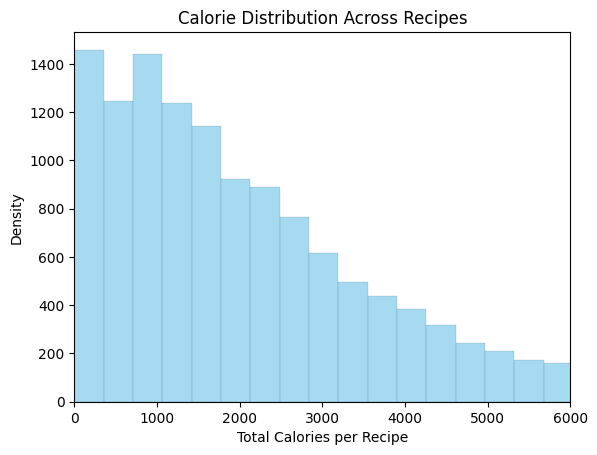

In [58]:
import seaborn as sns
kcal_values = [v['kcal_total'] for v in cal_dict.values()]
sns.histplot(kcal_values, bins=500, kde=False, color='skyblue')
plt.xlabel("Total Calories per Recipe")
plt.ylabel("Density")
plt.xlim(0, 6000)
plt.title("Calorie Distribution Across Recipes")
plt.show()
